In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 시계열 데이터 생성
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=1000, freq='D')
values = np.random.randn(1000)

# 데이터 프레임 생성
data = pd.DataFrame({'Date':dates, 'Value': values})
print(data)

# 결측치 생성
# 100 - 200 = NAN
data.loc[50:200, 'Value'] = np.nan
print(data.loc[50:200])

          Date     Value
0   2023-01-01  0.496714
1   2023-01-02 -0.138264
2   2023-01-03  0.647689
3   2023-01-04  1.523030
4   2023-01-05 -0.234153
..         ...       ...
995 2025-09-22 -0.281100
996 2025-09-23  1.797687
997 2025-09-24  0.640843
998 2025-09-25 -0.571179
999 2025-09-26  0.572583

[1000 rows x 2 columns]
          Date  Value
50  2023-02-20    NaN
51  2023-02-21    NaN
52  2023-02-22    NaN
53  2023-02-23    NaN
54  2023-02-24    NaN
..         ...    ...
196 2023-07-16    NaN
197 2023-07-17    NaN
198 2023-07-18    NaN
199 2023-07-19    NaN
200 2023-07-20    NaN

[151 rows x 2 columns]


In [5]:
# 최근접 이웃 보간 적용
data['Value_filled'] = data['Value'].interpolate(method='nearest')
print(data.loc[201])
print(data.loc[50:200])

Date            2023-07-21 00:00:00
Value                      0.560785
Value_filled               0.560785
Name: 201, dtype: object
          Date  Value  Value_filled
50  2023-02-20    NaN     -1.763040
51  2023-02-21    NaN     -1.763040
52  2023-02-22    NaN     -1.763040
53  2023-02-23    NaN     -1.763040
54  2023-02-24    NaN     -1.763040
..         ...    ...           ...
196 2023-07-16    NaN      0.560785
197 2023-07-17    NaN      0.560785
198 2023-07-18    NaN      0.560785
199 2023-07-19    NaN      0.560785
200 2023-07-20    NaN      0.560785

[151 rows x 3 columns]


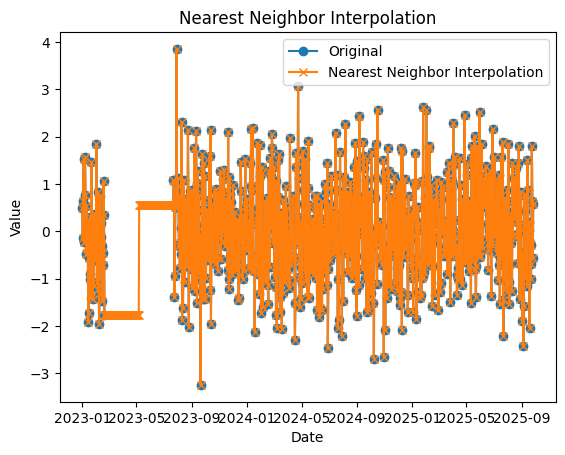

In [6]:
# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], 'o-', label='Original')
plt.plot(data['Date'], data['Value_filled'], 'x-', label='Nearest Neighbor Interpolation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Nearest Neighbor Interpolation')
plt.legend()
plt.show()